

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [3]:
#date format 'year-mm-dd'
# date -d "2 weeks ago"

yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'

twoDaysAgo = !date -d "2 days ago 13:00 " '+%Y-%m-%d'
oneWeekAgo = !date -d "1 week ago 13:00 " '+%Y-%m-%d'

beginDate = yesterday
print(yesterday, twoDaysAgo, oneWeekAgo)
print(beginDate)
startdate = str(beginDate)[1:-1]
print(startdate)


#hard code option
#startdate = "'2016-12-09'"

['2016-12-31'] ['2016-12-30'] ['2016-12-25']
['2016-12-31']
'2016-12-31'


### get url

In [4]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'


url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/rme2-xgvs.csv?$where=opened>='2016-12-31'


In [5]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

## Set Display Column with wider so no problem with Media URL series

In [6]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [8]:
df = pd.read_csv(url)

In [9]:
df.shape

(135, 16)

#### wow, 5 days > 1000 reports

In [10]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6679601,12/31/2016 11:39:52 PM,NaN,12/31/2016 11:45:45 PM,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,Intersection of FILBERT ST and GENOA PL,3,Telegraph Hill,"(37.8017346502964, -122.406526801952)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b2413da1350696e761f7/report.jpg
1,6679600,12/31/2016 11:39:09 PM,NaN,12/31/2016 11:44:51 PM,Open,Open,DPT SignShop 03 Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Sign - Not_Offensive,"492 FILBERT ST, SAN FRANCISCO, CA, 94133",3,Telegraph Hill,"(37.801727601735, -122.407669063227)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b2173da1350696e761ed/report.jpg
2,6679599,12/31/2016 11:38:46 PM,NaN,12/31/2016 11:44:12 PM,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,Intersection of FILBERT ST and MEDAU PL,3,North Beach,"(37.8015254608915, -122.408132601372)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1ff3da1350696e761e3/report.jpg


In [11]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [12]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6679601,2016-12-31 23:39:52,NaT,2016-12-31 23:45:45,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,Intersection of FILBERT ST and GENOA PL,3,Telegraph Hill,"(37.8017346502964, -122.406526801952)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b2413da1350696e761f7/report.jpg
1,6679600,2016-12-31 23:39:09,NaT,2016-12-31 23:44:51,Open,Open,DPT SignShop 03 Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Sign - Not_Offensive,"492 FILBERT ST, SAN FRANCISCO, CA, 94133",3,Telegraph Hill,"(37.801727601735, -122.407669063227)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b2173da1350696e761ed/report.jpg
2,6679599,2016-12-31 23:38:46,NaT,2016-12-31 23:44:12,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,Intersection of FILBERT ST and MEDAU PL,3,North Beach,"(37.8015254608915, -122.408132601372)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1ff3da1350696e761e3/report.jpg


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=31.0, right=31.0
  'left=%s, right=%s') % (left, right))


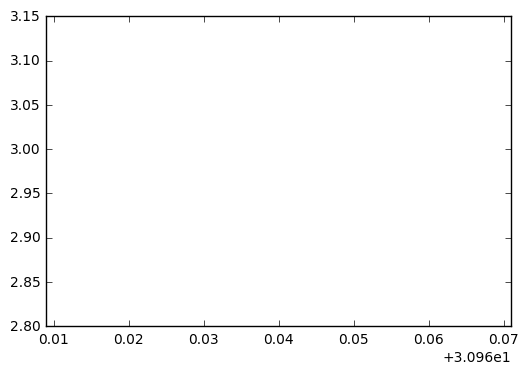

In [13]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=31.0, right=31.0
  'left=%s, right=%s') % (left, right))


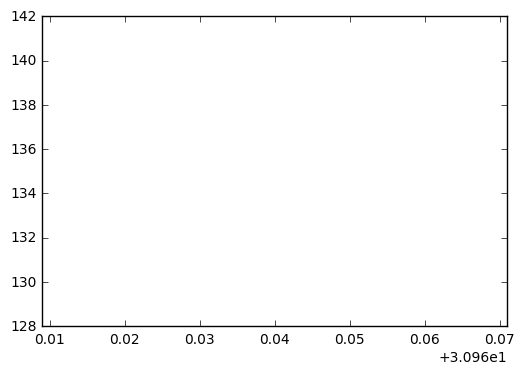

In [14]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=5.0, right=5.0
  'left=%s, right=%s') % (left, right))


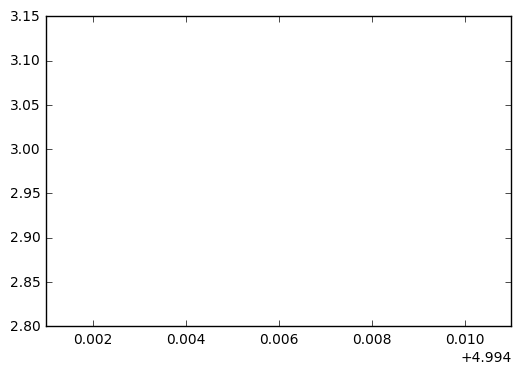

In [15]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [16]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [17]:

df['Request Details'].value_counts()


Pole - Not_Offensive                                16
Other_enter_additional_details_below - Offensive    12
Transit_Shelter_Platform - Not_Offensive            11
Signal_box - Not_Offensive                          11
Building_other - Not_Offensive                      10
Building_commercial - Not_Offensive                  9
Mail_box - Not_Offensive                             8
Building_commercial - Offensive                      7
City_receptacle - Not_Offensive                      6
Sidewalk_in_front_of_property - Offensive            5
Fire_Police_Callbox - Not_Offensive                  5
Sign - Not_Offensive                                 5
Sidewalk_in_front_of_property - Not_Offensive        5
Building_residential - Not_Offensive                 5
Sidewalk_structure - Not_Offensive                   4
Signal_box - Offensive                               3
Transit_Shelter_Platform - Offensive                 2
Fire_Police_Callbox - Offensive                      2
Bike_rack 

In [18]:
df['Supervisor District'].value_counts().sort_index()



1     11
3     21
4      6
5     13
6     18
7      3
8     31
9     20
10     9
11     3
Name: Supervisor District, dtype: int64

In [19]:
df.Neighborhood.value_counts()

Duboce Triangle            18
Mission                    18
Tenderloin                 13
Chinatown                   7
Lower Nob Hill              6
Potrero Hill                6
Outer Richmond              5
North Beach                 4
Outer Sunset                4
Mission Dolores             3
Bernal Heights              3
Inner Sunset                3
Golden Gate Park            3
Cole Valley                 3
Buena Vista                 3
Civic Center                2
Fairmount                   2
Cathedral Hill              2
Oceanview                   2
Downtown / Union Square     2
Excelsior                   2
Dolores Heights             2
Telegraph Hill              2
Parnassus Heights           1
University Mound            1
Lower Haight                1
Mint Hill                   1
Glen Park                   1
Bayview                     1
Haight Ashbury              1
Mission Terrace             1
Dogpatch                    1
Sutro Heights               1
Fisherman'

In [20]:
df[df.Neighborhood == 'Mission']

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
59,6678507,2016-12-31 14:03:07,NaT,2016-12-31 14:03:07,Open,Open,Clear Channel - Transit Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Transit_Shelter_Platform - Not_Offensive,"3490 18TH ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.761845884718, -122.421381526681)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58682b153da1350696e7572e/photo_20161231_140230.jpg
60,6678506,2016-12-31 14:01:15,NaT,2016-12-31 20:32:49,Open,Open,311 Service Request Queue - Hold,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"1855 FOLSOM ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.767442202896, -122.413937389764)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58682aa63da1350696e75723/photo_20161231_140103.jpg
61,6678496,2016-12-31 13:49:21,NaT,2016-12-31 13:49:21,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,Intersection of 19TH ST and SAN CARLOS ST,9,Mission,"(37.7601888876742, -122.419974854088)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/586827da3da1350696e7570f/photo_20161231_134844.jpg
62,6678495,2016-12-31 13:48:37,NaT,2016-12-31 13:48:37,Open,Open,US Postal Service Maintenance Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Mail_box - Not_Offensive,Intersection of 19TH ST and LEXINGTON ST,9,Mission,"(37.7601475157402, -122.420659554429)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/586827b03da1350696e75705/photo_20161231_134811.jpg
63,6678494,2016-12-31 13:48:00,NaT,2016-12-31 13:48:00,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,Intersection of 19TH ST and LEXINGTON ST,9,Mission,"(37.7601475157402, -122.420659554429)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/586827873da1350696e756fb/photo_20161231_134727.jpg
64,6678489,2016-12-31 13:46:49,NaT,2016-12-31 13:59:05,Open,Open,311 Service Request Queue - Hold,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,Intersection of 19TH ST and VALENCIA ST,8,Mission,"(37.7601012510183, -122.421425091251)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/586827443da1350696e756dc/photo_20161231_134445.jpg
89,6678213,2016-12-31 11:41:15,NaT,2016-12-31 11:41:15,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,Intersection of 18TH ST and VALENCIA ST,9,Mission,"(37.7617007549058, -122.421578568646)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/586809d63da1350696e753da/photo_20161231_114025.jpg
90,6678077,2016-12-31 10:39:45,NaT,2016-12-31 10:39:45,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Fire_Police_Callbox - Not_Offensive,Intersection of 16TH ST and MISSION ST,9,Mission,"(37.7650512510466, -122.419669041689)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5867fb693da1350696e752b2/photo_20161231_103911.jpg
91,6678053,2016-12-31 10:29:42,2016-12-31 11:25:21,2016-12-31 11:25:21,Closed,Case Resolved -,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,City_receptacle - Not_Offensive,Intersection of 24TH ST and MISSION ST,9,Mission,"(37.7522394710724, -122.418445426677)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5867f90f3da1350696e75296/photo_20161231_102854.jpg
92,6678049,2016-12-31 10:28:45,NaT,2016-12-31 10:29:27,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Pole -


### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [21]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

In [22]:

peskin = df[df['Supervisor District']==3]['Media URL']
peskin = peskin.reset_index(drop=True)
print(peskin[:])
peskin[:300].to_csv("./peskinlist.txt", index=False)


0                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b2413da1350696e761f7/report.jpg
1                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b2173da1350696e761ed/report.jpg
2                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1ff3da1350696e761e3/report.jpg
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1e53da1350696e761d9/report.jpg
4                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1cb3da1350696e761cf/report.jpg
5                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1973da1350696e761c5/report.jpg
6                                                                                                                 NaN
7                                                                                                                 NaN
8                                                       

In [23]:
print(peskin[:])

0                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b2413da1350696e761f7/report.jpg
1                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b2173da1350696e761ed/report.jpg
2                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1ff3da1350696e761e3/report.jpg
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1e53da1350696e761d9/report.jpg
4                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1cb3da1350696e761cf/report.jpg
5                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1973da1350696e761c5/report.jpg
6                                                                                                                 NaN
7                                                                                                                 NaN
8                                                       

# The whole City

In [24]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b2413da1350696e761f7/report.jpg
1                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b2173da1350696e761ed/report.jpg
2                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1ff3da1350696e761e3/report.jpg
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1e53da1350696e761d9/report.jpg
4                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1cb3da1350696e761cf/report.jpg
5                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1973da1350696e761c5/report.jpg
6                    http://mobile311.sfgov.org/media/san_francisco/report/photos/58689a0f3da1350696e7612e/report.jpg
7                    http://mobile311.sfgov.org/media/san_francisco/report/photos/586882f93da1350696e7603c/report.jpg
8                    http://mobile311.sfgov.org/media/sa

In [25]:
len(images)

89

In [26]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b2413da1350696e761f7/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b1ff3da1350696e761e3/report.jpg


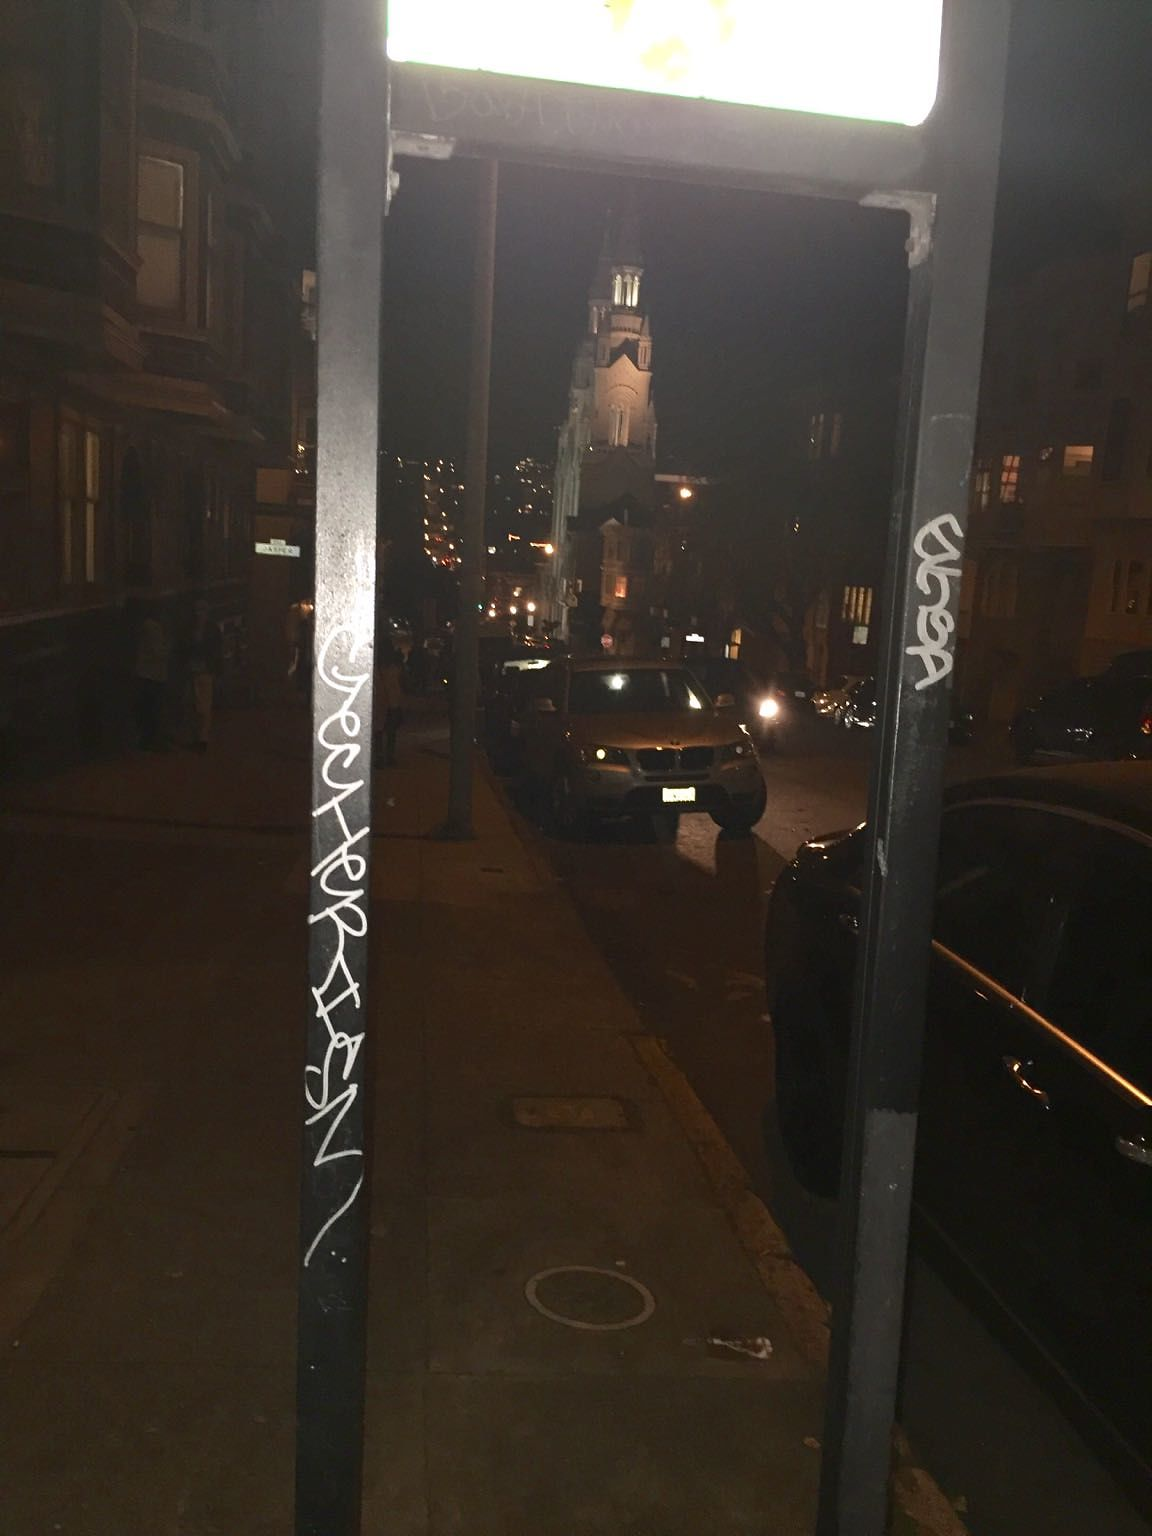

In [27]:
print(images[2])
Image(images[2])


In [28]:
!pwd

/home/gdillon/JupyterPractice/graffiti_SF311


In [29]:
images[:1000].to_csv("./imagelist.txt", index=False)


In [30]:
!yes| bash vidCreate.sh 

--2017-01-01 20:55:58--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b2413da1350696e761f7/report.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 233335 (228K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 227.87K  1.01MB/s    in 0.2s    

2017-01-01 20:55:58 (1.01 MB/s) - 'report.jpg' saved [233335/233335]

--2017-01-01 20:55:58--  http://mobile311.sfgov.org/media/san_francisco/report/photos/5868b2173da1350696e761ed/report.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 267648 (261K) [image/jpeg]
Saving to: 'report.jpg.1'

report.jpg.1        100%[===================>] 261.38K  --.-KB/s    in 0.05s   

2017-01-01 20:55:58 (5.56 MB/s) - 'report.jpg.1' saved [267648/267648]

--2017-01-01 20:55:58-

In [33]:
!ls -la


total 33000
drwxrwxr-x 5 gdillon gdillon     4096 Jan  1 20:59 .
drwxrwxr-x 9 gdillon gdillon     4096 Dec 20 12:02 ..
drwxrwxr-x 2 gdillon gdillon     4096 Dec 29 13:40 .ipynb_checkpoints
-rw-rw-r-- 1 gdillon gdillon    19266 Dec 15 19:05 ImportTablefromWikipedia.ipynb
-rw-rw-r-- 1 gdillon gdillon   242602 Jan  1 20:08 SF311 Annual -keh.ipynb
-rw-rw-r-- 1 gdillon gdillon   193092 Dec 29 13:39 SF311 Annual .ipynb
-rw-rw-r-- 1 gdillon gdillon   276804 Dec 15 19:05 San+Fran +Graffiti pull one day.ipynb
-rw-rw-r-- 1 gdillon gdillon   562269 Dec 15 19:05 San+Francisco+Graffiti with Video.ipynb
-rw-rw-r-- 1 gdillon gdillon   371033 Dec 29 15:35 box.html
-rw-rw-r-- 1 gdillon gdillon   358847 Jan  1 20:08 horizon.html
-rw-rw-r-- 1 gdillon gdillon     9128 Jan  1 20:55 imagelist.txt
drwxrwxr-x 2 gdillon gdillon    16384 Jan  1 20:56 input
drwxrwxr-x 3 gdillon gdillon     4096 Dec 20 11:46 ipynb
-rw-rw-r-- 1 gdillon gdillon   177678 Dec 29 16:42 lines.html
-rw-rw-r-- 1 gdillon gdillon 14597126 